In [1]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/gdrive')

MessageError: Error: credential propagation was unsuccessful

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import nn, optim
from torch.autograd import Variable
import pandas as pd
import numpy as np

In [3]:
%cd /content/gdrive/MyDrive/MTL-RED/

/content/gdrive/MyDrive/MTL-RED


In [4]:
!ls -lrt

total 395
-rw------- 1 root root   1197 Nov 28  2023 data_preprocess_mtl_red_cic_ids_10.py
-rw------- 1 root root   9821 Nov 28  2023 multitaskAutoencoders_mtl_red_cic_ids_10.py
drwx------ 2 root root   4096 Feb 13  2024 DATA
drwx------ 2 root root   4096 Mar  1 05:43 MODELS
drwx------ 2 root root   4096 Mar  1 18:40 __pycache__
drwx------ 2 root root   4096 Mar  5 19:58 RESULTS
-rw------- 1 root root   1356 Mar  7 19:36 data_preprocess_3.py
-rw------- 1 root root   9543 Mar  8 21:57 MTL_RED_CIC_IOT_3.py
drwx------ 2 root root   4096 Mar  9 23:05 BASELINES
-rw------- 1 root root   1388 Mar 16 21:51 data_preprocess_CIC_IOT_50.py
-rw------- 1 root root   9564 Mar 17 20:48 MTL_RED_CIC_IOT_50.py
-rw------- 1 root root   1354 Mar 18 00:00 data_preprocess_cic_ids.py
-rw------- 1 root root   1334 Mar 18 00:09 data_preprocess_cic_iomt.py
-rw------- 1 root root   9537 Mar 19 20:59 MTL_RED_IOMT_50.py
-rw------- 1 root root   9545 Mar 20 19:20 MTL_RED_CIC_IDS.py
-rw------- 1 root root   9536 Mar 

In [ ]:
#!python /content/gdrive/MyDrive/OOD_generalization/mate-mi-reg-model/multitaskAutoencoders.py

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

**BATCH = 50, DATA = 10K**

In [ ]:
from MTL_RED_IOMT_30 import MultitaskAutoencoder

SHAPE TRAIN DATA: (24477, 20)
Ytrain shape: (24477,)
D_in shape: 20


**TESTING**

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

In [ ]:
def load_data(path):

    #train_data = pd.read_csv(path, sep=',')
    #train_data = train_data.sample(frac = 1).reset_index(drop=True)
    train_data = path
    train_data[train_data.select_dtypes(np.float64).columns] = train_data.select_dtypes(np.float64).astype(np.float32)

    x_train = train_data.loc[:,train_data.columns != 'Label']

    x_train = torch.tensor(x_train.values)
    #x_train = x_train.values.astype['float32']

    y_train = train_data.loc[:,train_data.columns == 'Label']
    y_train = torch.tensor(y_train.values)
    y_train = y_train.long()

    print ("X train shape:", x_train.shape)
    print ("Y train shape:", y_train.shape)

    return x_train, y_train

In [ ]:
# from torch.utils.data import Dataset, DataLoader

from torch.utils.data import Dataset, DataLoader
class DataBuilder(Dataset):
    def __init__(self, path):
        #self.x, self.standardizer, self.wine = load_data(DATA_PATH)
        self.x, self.y = load_data(path)
        self.len=self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [ ]:
data_recon = pd.read_csv("/content/gdrive/MyDrive/MTL-RED/DATA/CSE_CIC_IDS/TRAIN/TEST_INFIL.csv")#CROSS_DOM_MQTT.csv") #TEST_OOD_RECON.csv") #TEST_OOD_SPOOFING.csv")
data_benign = pd.read_csv("/content/gdrive/MyDrive/MTL-RED/DATA/CSE_CIC_IDS/BENIGN_TEST.csv")


data_recon = data_recon.loc[data_recon['Label'] == 1]
#data_recon = data_recon.sample(n=10000, replace= True)

data_benign = data_benign.loc[data_benign['Label'] == 0]

data_benign = data_benign[0:5000]
data_recon = data_recon[0:5000]

data_test = pd.concat([data_recon, data_benign])
data_test = data_test.sample(frac = 1).reset_index(drop=True)

#data_bot = data_bot.loc[data_bot['Label'] == 1]
DATA_PATH = data_test[0:10000]
DATA_PATH

In [1]:
# data_set=DataBuilder(DATA_PATH)
# testloader=DataLoader(dataset=data_set,batch_size=10000)

D_in = 29
print ("D_in shape:", D_in)
H = 25
H2 = 15

D_in shape: 29


In [ ]:
#PATH = "/content/gdrive/MyDrive/MTL-RED/MODELS/MODELS_CIC_IOMT_DOS_DDOS_SPOOF_RECON/50_PERCENT/_multi_domain_MI_2_REC_06_2_2.pth"

#PATH = "/content/gdrive/MyDrive/MTL-RED/MODELS/MTAE/CIC_IOMT_TRAIN_FINAL_DOS_DDOS_SPOOF_RECON_30_PERCENT.pth"


PATH = "/content/gdrive/MyDrive/MTL-RED/MODELS/CIC_CSE_IDS/multi_domain_MI_2_REC_06_0.05_0.27.pth"

#PATH = "/content/gdrive/MyDrive/MTL-RED/MODELS/MTAE/CSE_CIC_IDS/CIC_CSE_IDS_TRAIN_IN_SOLARIS_GOLDEN_BOT_INFIL.pth"

In [ ]:
model_test = MultitaskAutoencoder(D_in, H, H2)#.to(device)
#map_location=torch.device('cpu')
#model_test.load_state_dict(torch.load(PATH))
torch.load(PATH, map_location=torch.device('cpu'), weights_only=True)

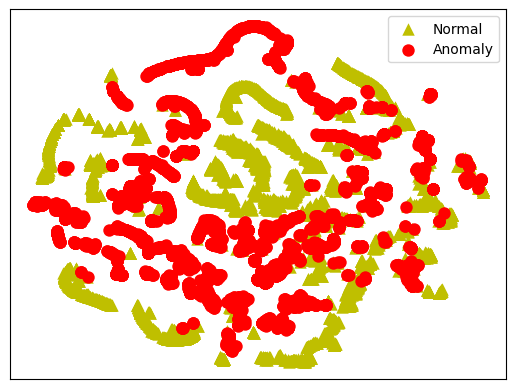

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

correct = 0
total = 0
predict_lst = []
labels_lst = []

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    model_test.eval()
    for data in testloader:
        X_test, labels = data
        # calculate outputs by running images through the network
        logits, recon_batch, Z = model_test(X_test)#.to(device)
        #print ("logits:", logits)

        Z = Z.detach().numpy()

        # PCA_model = TruncatedSVD(n_components=15).fit(Z)
        # data_PCA = PCA_model.transform(Z)

        PCA_model = TSNE(n_components=2, perplexity=30, learning_rate=200)
        data_PCA = PCA_model.fit_transform(Z)

        idxc1 = np.where(labels==0)
        idxc2 = np.where(labels==1)
        plt.scatter(data_PCA[idxc1,0],data_PCA[idxc1,1],s=80,c='y', marker='^',linewidths = 0, label='Normal')
        plt.scatter(data_PCA[idxc2,0],data_PCA[idxc2,1],s=80,c='r', marker='o',linewidths = 0, label='Anomaly')
        plt.gca().axes.get_xaxis().set_ticks([])
        plt.gca().axes.get_yaxis().set_ticks([])
        #plt.title('Latent Space Embedding')
        plt.legend(scatterpoints=1,loc='best')
        plt.show(block=1)


In [ ]:
normal_data = np.random.randn(1000, 3)  # Example of 1000 normal 3-dimensional points
anomaly_data = np.random.randn(100, 3)

In [ ]:
print (normal_data.shape)
print (anomaly_data.shape)

(1000, 3)
(100, 3)


In [ ]:
D_in = 26
print ("D_in shape:", D_in)
H = 20
H2 = 15

D_in shape: 26


**TEST MULTIPLE DATASETS**

In [ ]:
DATA_PATHS = ["/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/TEST_OOD_RECON.csv","/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/CROSS_DOM_MQTT.csv",
              "/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/TEST_OOD_SPOOFING.csv", "/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/TRAIN_IN_DOS.csv",
              "/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/TRAIN_IN_DDOS.csv", "/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/TRAIN_IN_BENIGN.csv",
              "/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/TEST_OOD_BENIGN.csv"
              ]

In [ ]:
DATA_PATHS = ["/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOT_MULTICLASS/TEST_IN_BENIGN.csv","/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOT_MULTICLASS/TEST_OOD_DOS.csv",
              "/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOT_MULTICLASS/TEST_OOD_DDOS.csv",
              "/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOT_MULTICLASS/TEST_OOD_BRUTFORCE.csv",
              "/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOT_MULTICLASS/TEST_OOD_MIRAI.csv",
              "/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOT_MULTICLASS/TEST_OOD_RECON.csv", "/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOT_MULTICLASS/TEST_OOD_SPOOF.csv",
              "/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOT_MULTICLASS/TEST_OOD_WEB.csv", "/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOT_MULTICLASS/TEST_OOD_BENIGN.csv"
              ]

In [ ]:
data_train_recon_iomt = pd.read_csv("/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/TEST_OOD_RECON.csv")
data_train_mqtt_iomt = pd.read_csv("/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/CROSS_DOM_MQTT.csv")
data_train_spoofing_iomt = pd.read_csv("/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/TEST_OOD_SPOOFING.csv")
data_train_dos_iomt = pd.read_csv("/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/TRAIN_IN_DOS.csv")
data_train_ddos_iomt = pd.read_csv("/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/TRAIN_IN_DDOS.csv")
train_in_benign_iomt = pd.read_csv("/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/TRAIN_IN_BENIGN.csv")
train_ood_benign_iomt = pd.read_csv("/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/TEST_OOD_BENIGN.csv")


In [ ]:

data_train_ddos_iot = pd.read_csv("/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOT_MULTICLASS/TEST_OOD_DDOS.csv")
data_train_dos_iot = pd.read_csv("/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOT_MULTICLASS/TEST_OOD_DOS.csv")
data_train_brut_iot = pd.read_csv("/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOT_MULTICLASS/TEST_OOD_BRUTFORCE.csv")
data_train_mirai_iot = pd.read_csv("/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOT_MULTICLASS/TEST_OOD_MIRAI.csv")
data_train_recon_iot = pd.read_csv("/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOT_MULTICLASS/TEST_OOD_RECON.csv")
train_ood_spoof_iot = pd.read_csv("/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOT_MULTICLASS/TEST_OOD_SPOOF.csv")
train_ood_web_iot = pd.read_csv("/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOT_MULTICLASS/TEST_OOD_WEB.csv")
train_in_benign_iot = pd.read_csv("/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOT_MULTICLASS/TEST_IN_BENIGN.csv")


In [ ]:
data_train_ddos_iot = data_train_ddos_iot.rename(columns={"label": 'Label'})
data_train_dos_iot = data_train_dos_iot.rename(columns={"label": 'Label'})
data_train_brut_iot = data_train_brut_iot.rename(columns={"label": 'Label'})
data_train_mirai_iot = data_train_mirai_iot.rename(columns={"label": 'Label'})
data_train_recon_iot = data_train_recon_iot.rename(columns={"label": 'Label'})
train_ood_web_iot= train_ood_web_iot.rename(columns={"label": 'Label'})
train_in_benign_iot = train_in_benign_iot.rename(columns={"label": 'Label'})

In [ ]:
cols = ["Header_Length", "Duration", "Rate", "rst_count",  "ack_count", "syn_count",
               "fin_count", 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'Label' ]


# # Replace values in the 'Department' colum
#data_train_mirai

In [ ]:
data_train_recon_iomt = data_train_recon_iomt[cols]
data_train_mqtt_iomt = data_train_mqtt_iomt[cols]
data_train_spoofing_iomt = data_train_spoofing_iomt[cols]
data_train_dos_iomt = data_train_dos_iomt[cols]
data_train_ddos_iomt = data_train_ddos_iomt[cols]
train_in_benign_iomt = train_in_benign_iomt[cols]
train_ood_benign_iomt = train_ood_benign_iomt[cols]


data_train_ddos_iot = data_train_ddos_iot[cols]
data_train_dos_iot = data_train_dos_iot[cols]
data_train_brut_iot = data_train_brut_iot[cols]
data_train_mirai_iot = data_train_mirai_iot[cols]
data_train_recon_iot = data_train_recon_iot[cols]
train_ood_web_iot = train_ood_web_iot[cols]
train_in_benign_iot = train_in_benign_iot[cols]


In [ ]:
DATA_PATHS = ['']

In [ ]:
%cd /content/gdrive/MyDrive/MTL-RED/MODELS/CIC_IOMT/30_PERCENT_SPOOF/

/content/gdrive/MyDrive/MTL-RED/MODELS/CIC_IOMT/30_PERCENT_SPOOF


In [ ]:
!ls -lrt

In [ ]:
import os
import glob


directory_path = '/content/gdrive/MyDrive/MTL-RED/MODELS/CIC_IOMT/30_PERCENT_SPOOF/'

# Use glob to get a list of all CSV files in the directory
model_files = glob.glob(os.path.join(directory_path, '_multi_domain_MI_2_REC_06_2.0_2.0.pth'))

for model in model_files:
  model = model.split("/")[-1]
  print (model)

  model_test = MultitaskAutoencoder(D_in, H, H2)#.to(device)
  map_location=torch.device('cpu')
  model_test.load_state_dict(torch.load(model)) # Load model
  model_test.eval()

  accuracies = []

  for data in DATA_PATHS:
    #print (data)
    data_set=DataBuilder(data)
    testloader=DataLoader(dataset=data_set,batch_size=1)

    predict_lst = []
    labels_lst = []
    correct = 0
    total = 0

    with torch.no_grad():
      for data in testloader:
        X_test, labels = data

        # calculate outputs by running images through the network
        logits, recon_batch, Z = model_test(X_test)#.to(device)
        #print ("logits:", logits)

        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(logits.data, 1)
        predict_lst.append(predicted.cpu().detach().numpy())
        #predicted = torch.argmax(logits)

        labels_lst.append(labels[0].cpu().detach().numpy())

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

      accuracy = 100 * correct / total
      #print (accuracy)

      accuracies.append(accuracy)
      #print (accuracies)

  row_data = {'RECON_IOMT': accuracies[0],'MQTT': accuracies[1],'SPOOF_IOMT': accuracies[2],'DOS_IOMT': accuracies[3], 'DDOS_IOMT': accuracies[4],
                  'BENIGN_IOMT': accuracies[5], 'OOD-BENIGN_IOMT': accuracies[6], 'DDOS_IOT': accuracies[7], 'DOS_IOT': accuracies[8],
              'BRUT_IOT': accuracies[9], 'MIRAI_IOT': accuracies[10], 'RECON_IOT': accuracies[11], 'WEB_IOT': accuracies[12], 'BENIGN_IOT': accuracies[13] }

  #print ("ROW DATA:", row_data)

  df = pd.DataFrame()
  df_new = pd.DataFrame([row_data])

  # Concatenate the original DataFrame with the new row DataFrame
  df = pd.concat([df, df_new], ignore_index=True)

  filename = f"file_{model}"

  df.to_csv("/content/gdrive/MyDrive/MTL-RED/RESULTS/CIC_IOMT/ALL_CLASSES_IOT_IOMT_2/results_{0}.csv".format(filename), index = False)



_multi_domain_MI_2_REC_06_2.0_2.0.pth


RuntimeError: Error(s) in loading state_dict for MultitaskAutoencoder:
	size mismatch for linear2.weight: copying a param with shape torch.Size([13, 20]) from checkpoint, the shape in current model is torch.Size([15, 20]).
	size mismatch for linear2.bias: copying a param with shape torch.Size([13]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for lin_bn2.weight: copying a param with shape torch.Size([13]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for lin_bn2.bias: copying a param with shape torch.Size([13]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for lin_bn2.running_mean: copying a param with shape torch.Size([13]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for lin_bn2.running_var: copying a param with shape torch.Size([13]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for linear3.weight: copying a param with shape torch.Size([13, 13]) from checkpoint, the shape in current model is torch.Size([15, 15]).
	size mismatch for linear3.bias: copying a param with shape torch.Size([13]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for lin_bn3.weight: copying a param with shape torch.Size([13]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for lin_bn3.bias: copying a param with shape torch.Size([13]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for lin_bn3.running_mean: copying a param with shape torch.Size([13]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for lin_bn3.running_var: copying a param with shape torch.Size([13]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for fc1.weight: copying a param with shape torch.Size([15, 13]) from checkpoint, the shape in current model is torch.Size([15, 15]).
	size mismatch for fc4.weight: copying a param with shape torch.Size([13, 15]) from checkpoint, the shape in current model is torch.Size([15, 15]).
	size mismatch for fc4.bias: copying a param with shape torch.Size([13]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for linear4.weight: copying a param with shape torch.Size([13, 13]) from checkpoint, the shape in current model is torch.Size([15, 15]).
	size mismatch for linear4.bias: copying a param with shape torch.Size([13]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for lin_bn4.weight: copying a param with shape torch.Size([13]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for lin_bn4.bias: copying a param with shape torch.Size([13]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for lin_bn4.running_mean: copying a param with shape torch.Size([13]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for lin_bn4.running_var: copying a param with shape torch.Size([13]) from checkpoint, the shape in current model is torch.Size([15]).
	size mismatch for linear5.weight: copying a param with shape torch.Size([20, 13]) from checkpoint, the shape in current model is torch.Size([20, 15]).

**OOD**

In [ ]:
DATA_PATHS = ["/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/TEST_OOD_RECON.csv","/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/CROSS_DOM_MQTT.csv",
              "/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/TEST_OOD_SPOOFING.csv", "/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/TRAIN_IN_DOS.csv",
              "/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/TRAIN_IN_DDOS.csv", "/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/TRAIN_IN_BENIGN.csv",
              "/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/TEST_OOD_BENIGN.csv"
              ]

In [ ]:
X

In [ ]:
X = pd.read_csv("/content/gdrive/MyDrive/MTL-RED/DATA/CIC_IOMT/CROSS_DOM_MQTT.csv")
X

In [ ]:
X

In [ ]:
X

In [ ]:
Y